x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


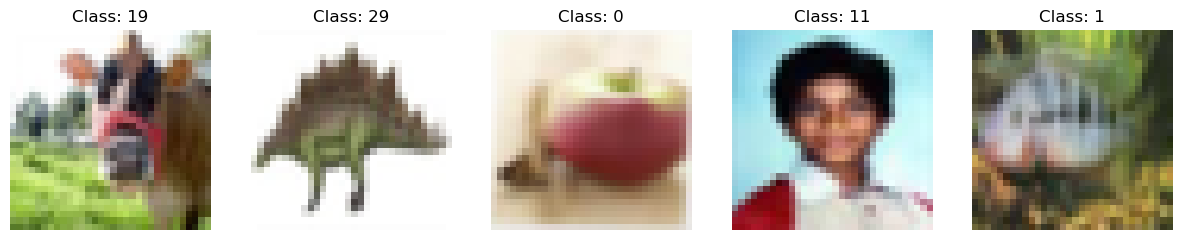

Model compiled successfully!
Epoch 1/15
1250/1250 [==============================] - 61s 48ms/step - loss: 4.1244 - accuracy: 0.0712 - val_loss: 3.5803 - val_accuracy: 0.1695
Epoch 2/15
1250/1250 [==============================] - 54s 44ms/step - loss: 3.5914 - accuracy: 0.1493 - val_loss: 3.2563 - val_accuracy: 0.2274
Epoch 3/15
1250/1250 [==============================] - 60s 48ms/step - loss: 3.3512 - accuracy: 0.1904 - val_loss: 3.0169 - val_accuracy: 0.2656
Epoch 4/15
1250/1250 [==============================] - 57s 46ms/step - loss: 3.1892 - accuracy: 0.2206 - val_loss: 2.9015 - val_accuracy: 0.2805
Epoch 5/15
1250/1250 [==============================] - 53s 43ms/step - loss: 3.0752 - accuracy: 0.2393 - val_loss: 2.8043 - val_accuracy: 0.3046
Epoch 6/15
1250/1250 [==============================] - 65s 52ms/step - loss: 2.9850 - accuracy: 0.2591 - val_loss: 2.7272 - val_accuracy: 0.3131
Epoch 7/15
1250/1250 [==============================] - 64s 51ms/step - loss: 2.9085 - accuracy

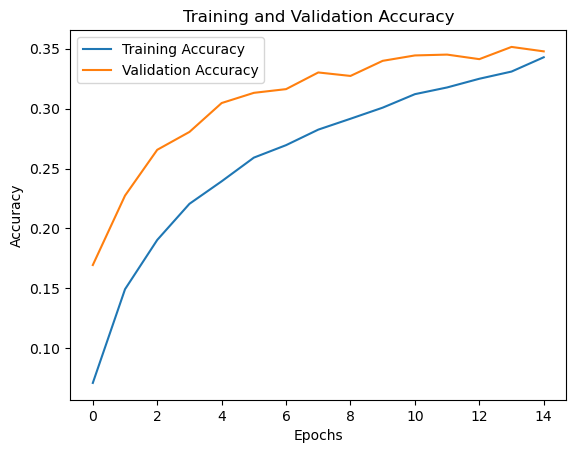

Epoch 1/10
1250/1250 [==============================] - 37s 28ms/step - loss: 4.3204 - accuracy: 0.0396 - val_loss: 3.9610 - val_accuracy: 0.0913
Epoch 2/10
1250/1250 [==============================] - 56s 45ms/step - loss: 3.9097 - accuracy: 0.0952 - val_loss: 3.6293 - val_accuracy: 0.1497
Epoch 3/10
1250/1250 [==============================] - 45s 36ms/step - loss: 3.6730 - accuracy: 0.1311 - val_loss: 3.4713 - val_accuracy: 0.1763
Epoch 4/10
1250/1250 [==============================] - 67s 54ms/step - loss: 3.5062 - accuracy: 0.1600 - val_loss: 3.2421 - val_accuracy: 0.2244
Epoch 5/10
1250/1250 [==============================] - 59s 48ms/step - loss: 3.3924 - accuracy: 0.1833 - val_loss: 3.1326 - val_accuracy: 0.2420
Epoch 6/10
1250/1250 [==============================] - 56s 44ms/step - loss: 3.3015 - accuracy: 0.1978 - val_loss: 3.0528 - val_accuracy: 0.2575
Epoch 7/10
1250/1250 [==============================] - 66s 53ms/step - loss: 3.2312 - accuracy: 0.2118 - val_loss: 3.1059 -

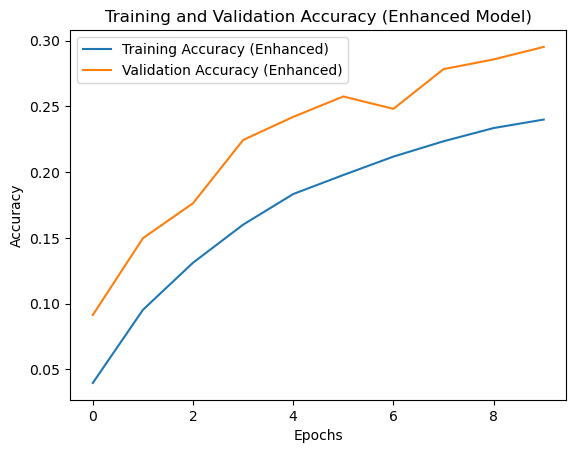

In [1]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Step 1: Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Step 2: Display dataset shape
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Display first 5 images from the training set
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f"Class: {y_train[i][0]}")
    axes[i].axis("off")
plt.show()

# Step 3: Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Step 4: Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
print("Model compiled successfully!")

# Step 6: Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=15, verbose=1)
print("Training completed!")

# Step 7: Get predictions and evaluate the model
y_pred = model.predict(x_test)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test_classes, y_pred_classes))

# Step 8: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 9: Enhanced model with Dropout
model_enhanced = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

# Step 10: Compile and train the enhanced model
model_enhanced.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_enhanced = model_enhanced.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Step 11: Plot enhanced model training and validation accuracy
plt.plot(history_enhanced.history['accuracy'], label='Training Accuracy (Enhanced)')
plt.plot(history_enhanced.history['val_accuracy'], label='Validation Accuracy (Enhanced)')
plt.title('Training and Validation Accuracy (Enhanced Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Solution for CIFAR-100 Image Classification Task

In this solution, I performed the following steps:

1. Loaded the CIFAR-100 dataset: This dataset consists of 100 classes with 32x32 color images. The dataset was split into training, validation, and test sets.


2. Preprocessed the data: The images were normalized to values between 0 and 1 by dividing by 255.0, and the labels were one-hot encoded to prepare them for model training.


3. Built a Convolutional Neural Network (CNN): I used a CNN with two convolutional layers, followed by max-pooling layers. A dense layer with 128 units was used, and dropout was added to prevent overfitting.


4. Trained the model: The model was trained using the Adam optimizer and categorical crossentropy loss function, with 15 epochs and a batch size of 32.


5. Evaluated the model: After training, the model was evaluated on the test set. Accuracy and other classification metrics (precision, recall, F1 score) were computed.


6. Visualized the performance: I plotted the training and validation accuracy over the epochs to understand the model’s learning behavior.


7. Enhanced the model: I added more dropout layers to improve the generalization of the model and re-trained it.


8. Visualized the enhanced model’s performance: Finally, I plotted the training and validation accuracy for the enhanced model to assess the improvements.